# Project: Investigating FBI Gun Data
Date: Apr 1, 2021

Author: Jordan Taylor
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In this dataset will be exploring the FBI Gun data and comparing it with US censes data. and we will be answering the following questions with our data analysis. 

1. What census data is most associated with high gun per capita? 
2. Which states have had the highest growth in gun registrations?
3. What is the overall trend of gun purchases?

In [477]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [478]:
#Load Data

gun_data = pd.read_excel('./ncis-and-census-data/gun_data.xlsx')
census_data = pd.read_csv('./ncis-and-census-data/U.S. Census Data.csv')
gun_data.head()
census_data.head(5)
#census_data.shape

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population_estimates_base_06/1/2016,NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,Population_estimates_base_04/1/2010,NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,Population_percent_change_04/01/2010-06/01/2016,NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,Population_Census_04/01/2010,NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

### census_data:
Looking at our dataset we can see some initial issues that we will need to clean up to be able to make out data more readable. 

0. Clean up columns to include `'_'` between spaces `' '`.

In [479]:
census_data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

1. `Fact Note` can be drops looks to have no usable data

In [480]:
#census_data.fact_note.value_counts()
census_data.fact_note

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
                            ...                        
80               Footnote on this item in place of data
81                                        Not available
82      Suppressed; does not meet publication standards
83                                       Not applicable
84    Value greater than zero but less than half uni...
Name: fact_note, Length: 85, dtype: object

In [481]:
census_data.drop('fact_note', axis=1, inplace=True)

In [482]:
census_data.head()

,fact,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,Population_estimates_base_06/1/2016,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,Population_estimates_base_04/1/2010,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,Population_percent_change_04/01/2010-06/01/2016,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,Population_Census_04/01/2010,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


2. Rows looks to have good usable data however looks like only the first 4 Rows are only going to be the most useful since we may not have any data to correlate from `census_data` to `gun_data` ie mapping data like `Native Hawaiian and Other Pacific Islande` to `private_sale_handgun` For this reason we can drop the all rows except the first 4.

In [483]:
census_data.drop(census_data.index[4:], inplace=True)
census_data.head()

,fact,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,Population_estimates_base_06/1/2016,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,Population_estimates_base_04/1/2010,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,Population_percent_change_04/01/2010-06/01/2016,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,Population_Census_04/01/2010,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"


3. We can also clear up the column `fact` makes this look more readable. Since we only had 4 rows we can change this is excel, since we drop all other rows.


*From:*
`
Population estimates, July 1, 2016,  (V2016)
Population estimates base, April 1, 2010,  (V2016)
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
Population, Census, April 1, 2010
`


To:
`Population_estimates_base_06/1/2016
Population_estimates_base, 04/1/2010`

4. We can also clean up the numbers in this dataset as well, we can see that some columns have `,` and other do not have any, we can make this more consistant.
    - We can see that `south_dakota` and `tennessee` 

In [484]:
census_data.head(1)

,fact,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,Population_estimates_base_06/1/2016,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


In [485]:
census_data.replace(',','' , regex=True, inplace=True)
census_data.replace('%','' , regex=True, inplace=True )
census_data.head(30)

,fact,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,Population_estimates_base_06/1/2016,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,Population_estimates_base_04/1/2010,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,Population_percent_change_04/01/2010-06/01/2016,1.70,4.50,8.40,2.50,5.40,10.20,0.10,6.00,9.60,...,0.063,0.048,10.80,10.40,-0.20,5.10,8.40,-1.20,1.60,3.90
3,Population_Census_04/01/2010,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626


In [486]:
census_data.shape

(4, 51)

In [487]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fact            4 non-null      object
 1   alabama         4 non-null      object
 2   alaska          4 non-null      object
 3   arizona         4 non-null      object
 4   arkansas        4 non-null      object
 5   california      4 non-null      object
 6   colorado        4 non-null      object
 7   connecticut     4 non-null      object
 8   delaware        4 non-null      object
 9   florida         4 non-null      object
 10  georgia         4 non-null      object
 11  hawaii          4 non-null      object
 12  idaho           4 non-null      object
 13  illinois        4 non-null      object
 14  indiana         4 non-null      object
 15  iowa            4 non-null      object
 16  kansas          4 non-null      object
 17  kentucky        4 non-null      object
 18  louisiana     

In [488]:
census_data.columns

Index(['fact', 'alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'florida', 'georgia', 'hawaii',
       'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky',
       'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan',
       'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada',
       'new_hampshire', 'new_jersey', 'new_mexico', 'new_york',
       'north_carolina', 'north_dakota', 'ohio', 'oklahoma', 'oregon',
       'pennsylvania', 'rhode_island', 'south_carolina', 'south_dakota',
       'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington',
       'west_virginia', 'wisconsin', 'wyoming'],
      dtype='object')

5. Change the dtype `objects` to `int`

In [489]:
#Dateframe for moving float values
census_data_float = census_data.iloc[:, 1:50].astype('float64')


In [490]:
census_data_float.head()

,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,georgia,...,south_carolina,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin
0,4863300.0,741894.0,6931071.0,2988248.0,39250017.0,5540545.0,3576452.0,952065.0,20612439.0,10310371.0,...,4961119.000,865454.000,6651194.000,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0
1,4780131.0,710249.0,6392301.0,2916025.0,37254522.0,5029324.0,3574114.0,897936.0,18804592.0,9688680.0,...,4625410.000,814195.000,6346298.000,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0
2,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,9.6,6.4,...,0.073,0.063,0.048,10.8,10.4,-0.2,5.1,8.4,-1.2,1.6
3,4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,9687653.0,...,4625364.000,814180.000,6346105.000,25145561.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0


In [491]:
#Dropping all rows for census_data concat
census_data = census_data.loc[:, census_data.columns.intersection(['fact'])]
census_data.head()

,fact
0,Population_estimates_base_06/1/2016
1,Population_estimates_base_04/1/2010
2,Population_percent_change_04/01/2010-06/01/2016
3,Population_Census_04/01/2010


In [507]:
#Concatanating the two dataframes that we split.
census_df = pd.concat([census_data, census_data_float], axis=1)
#census_data.info()
census_df.head()

,fact,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south_carolina,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin
0,Population_estimates_base_06/1/2016,4863300.0,741894.0,6931071.0,2988248.0,39250017.0,5540545.0,3576452.0,952065.0,20612439.0,...,4961119.000,865454.000,6651194.000,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0
1,Population_estimates_base_04/1/2010,4780131.0,710249.0,6392301.0,2916025.0,37254522.0,5029324.0,3574114.0,897936.0,18804592.0,...,4625410.000,814195.000,6346298.000,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0
2,Population_percent_change_04/01/2010-06/01/2016,1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,9.6,...,0.073,0.063,0.048,10.8,10.4,-0.2,5.1,8.4,-1.2,1.6
3,Population_Census_04/01/2010,4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,...,4625364.000,814180.000,6346105.000,25145561.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0


### gun_data:

1. Frist thing we can do since we can see that we have multiple rows with missing values. we can fill the null values with our mean for each column. 

In [508]:
gun_data.info()
#gun_data.month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [ ]:
gun_data.fillna(gun_data.mean(), inplace=True)

In [509]:
#gun_data[gun_data.rentals_handgun.isnull()]
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


2. Based on our criteria we can drop all columns not related. 'prepawn_handgun' to 'return_to_seller_other'

In [ ]:
gun_data.describe()
gun_data.columns

In [510]:
gun_data.drop(gun_data.iloc[:, 9:26], axis=1, inplace=True)
gun_data.drop('admin', axis=1, inplace=True)

In [511]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           12485 non-null  object 
 1   state           12485 non-null  object 
 2   permit          12461 non-null  float64
 3   permit_recheck  1100 non-null   float64
 4   handgun         12465 non-null  float64
 5   long_gun        12466 non-null  float64
 6   other           5500 non-null   float64
 7   multiple        12485 non-null  int64  
 8   totals          12485 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 878.0+ KB


3. Fix the total column to reflect the current columns. ie handgun, long_gun, other, multiple

In [521]:
gun_data['totals'] = gun_data.handgun + gun_data.long_gun + gun_data.other + gun_data.multiple
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,12592.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,5629.0
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,20560.0
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,10941.0
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,64730.0


In [520]:
gun_data_16 = gun_data[gun_data['month'] == 2016]
gun_data_16.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,totals


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What census data is most associated with high gun per capita?

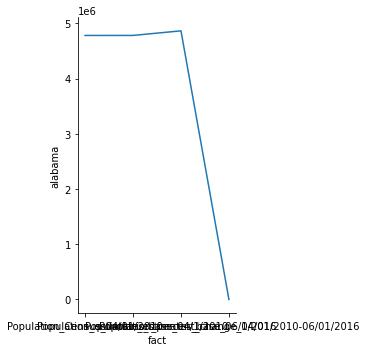

In [517]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
sns.relplot('fact', 'alabama', data=census_df, kind='line');


In [ ]:
census_data.info()

### Research Question 2 Which states have had the highest growth in gun registrations?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Research Question 3 What is the overall trend of gun purchases?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!